# Areas of interest

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import contextily as ctx

import numpy as np

from utils import helper

In [2]:
geo_antennas = gpd.read_file('../data/affected_btsid/affected_btsid.shp')
geo_antennas.crs = 'EPSG:4674'

zonas_geo = gpd.read_file('../data/zonas/ZONA_C17.shp')
zonas_geo.crs = 'EPSG:4674'

zonas_se = pd.read_csv('../data/auxvars_zone_census.csv.tar.gz')

zonas_geo.GEOCODIGO = zonas_geo.GEOCODIGO.astype(str)
zonas_se.ZONA = zonas_se.ZONA.astype(str)

zonas_geo = zonas_geo.merge(zonas_se, left_on='GEOCODIGO', right_on='ZONA')

geo_antennas = geo_antennas.sjoin(zonas_geo, how='left', predicate='intersects')

In [5]:
zonas_geo = gpd.read_file('../data/zonas/ZONA_C17.shp')
zonas_geo.crs = 'EPSG:4674'
zonas_geo = zonas_geo.to_crs(epsg=3857)
chile_border_adm1=chile_border_adm1.to_crs(epsg=3857)

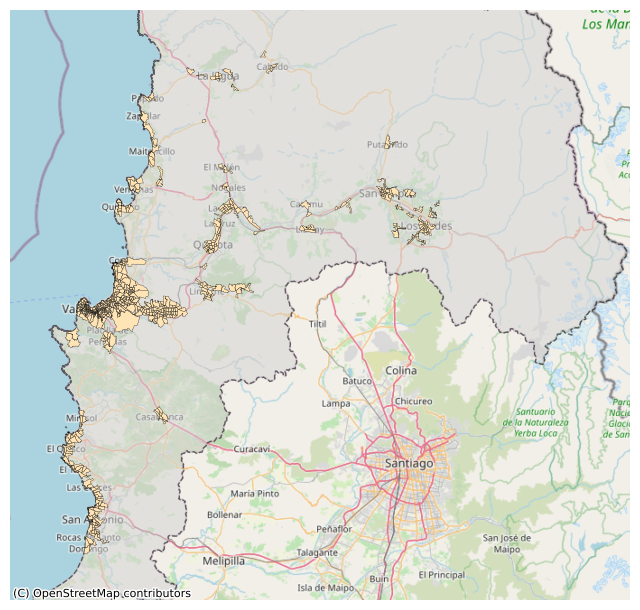

In [6]:
# Main figure (gdf5, fires, towers)
fig, ax = plt.subplots(figsize=(8, 8))
chile_border_adm1[chile_border_adm1['ADM1_ES'] == 'Región de Valparaíso'].plot(color='lightgray', ax=ax, alpha=0.5,
                                                                               edgecolor='black', linestyle='--', linewidth=1)
zonas_geo.plot(ax=ax, facecolor='moccasin', alpha=1, edgecolor='black', linewidth=0.2)
ax.set_xlim([-0.8*1e7, -0.779*1e7])
ax.set_ylim([-4*1e6, -3.8*1e6])
ax.set_axis_off()

# Add basemap to the main figure
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show();

In [3]:
zonas_geo.columns

Index(['REGION', 'NOM_REGION', 'PROVINCIA', 'NOM_PROVIN', 'COMUNA',
       'NOM_COMUNA', 'URBANO', 'DISTRITO', 'LOC_ZON', 'GEOCODIGO',
       'SHAPE_Leng', 'SHAPE_Area', 'geometry', 'ZONA', 'total_people',
       'percent_over_65', 'percent_bachelor', 'percent_female',
       'percent_nonwhite', 'percent_unemployed', 'percent_child',
       'mean_CANT_PER', 'std_CANT_PER', 'rural'],
      dtype='object')

In [4]:
warned_towers = pd.read_csv('../data/warned_towers.csv')

warned_towers['date'] = pd.to_datetime(warned_towers['date'])

warned_towers = warned_towers.merge(geo_antennas[['bts_id', 'geometry']], on='bts_id', how='left')
warned_towers = gpd.GeoDataFrame(warned_towers, geometry='geometry', crs='EPSG:4674')

btsid_census_sociodem=pd.read_csv('../data/btsid_census_sociodem_timur.csv')

In [3]:
chile_border_adm0 = gpd.read_file('../data/data_meta/borders/chl_admbnda_adm0_bcn_20211008.shp')
chile_border_adm1 = gpd.read_file('../data/data_meta/borders/chl_admbnda_adm1_bcn_20211008.shp')
chile_border_adm3 = gpd.read_file('../data/data_meta/borders/chl_admbnda_adm3_bcn_20211008.shp')
incendio_gpd = gpd.read_file('../data/ED_AreasAfectadasIncendio_Valparaiso/ED_AreasAfectadasIncendio_Valparaiso.shp')

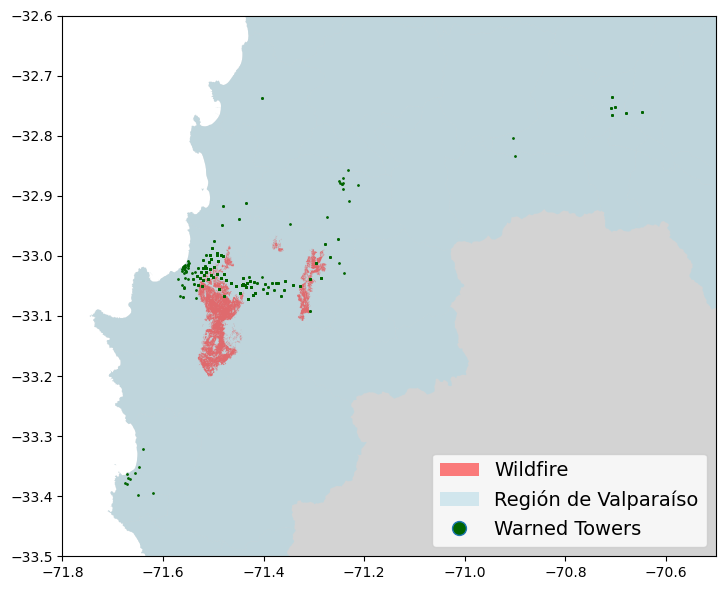

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))  

chile_border_adm0.plot(color='lightgray', ax=ax)
chile_border_adm3[chile_border_adm3['ADM1_ES'] == 'Región de Valparaíso'].plot(color='lightblue', ax=ax, alpha=0.5)
incendio_gpd.plot(color='red', alpha=0.5, ax=ax)
warned_towers.plot(color='darkgreen', markersize=1, ax=ax, legend=True)

ax.set_ylim( -33.5, -32.6)
ax.set_xlim(-71.8, -70.5)

rect1 = patches.Rectangle((0, 0), 1.3, 0.9, linewidth=0, color='red', alpha=0.5)
rect2 = patches.Rectangle((0, 0), 1.3, 0.9, linewidth=0, color='lightblue', alpha=0.5)
rect3 = plt.Line2D([0], [0], marker='o', linewidth=0, markerfacecolor='darkgreen', markersize=10)
handles_to_append = [rect1, rect2, rect3]

# Explicitly specify handles and labels for the legend
handles, labels = [], []
for line in ax.get_lines():
    handles.append(line)
    labels.append(line.get_label())
handles.extend(handles_to_append)

labels_to_append = ['Wildfire', 'Región de Valparaíso', 'Warned Towers']
labels.extend(labels_to_append)

ax.legend(handles, labels, fontsize=14, loc='lower right')

plt.tight_layout()
# plt.savefig('visuals_/map_warned_towers.jpg', dpi=300)

plt.show();

In [7]:
geo_antennas = geo_antennas.to_crs(epsg=3857)
zonas_geo = zonas_geo.to_crs(epsg=3857)
incendio_gpd = incendio_gpd.to_crs(epsg=3857)
warned_towers = warned_towers.to_crs(epsg=3857)
chile_border_adm3 = chile_border_adm3.to_crs(epsg=3857)
chile_border_adm1 = chile_border_adm1.to_crs(epsg=3857)

In [8]:
warned_towers_unique=warned_towers[['bts_id', 'geometry']].drop_duplicates().reset_index(drop=True)

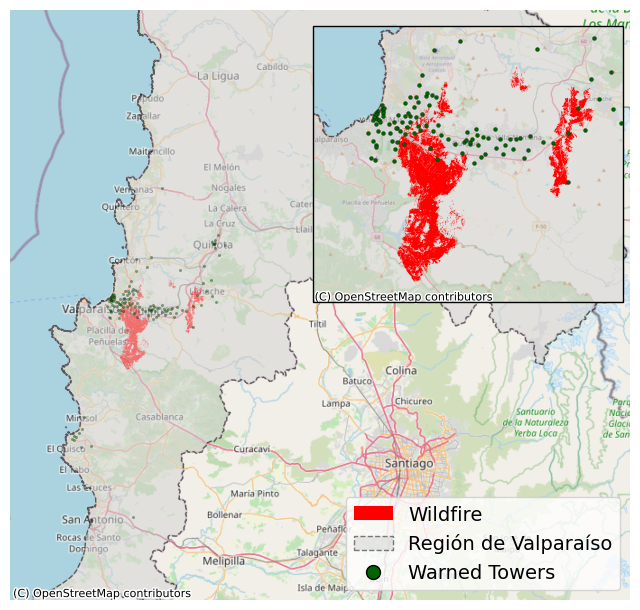

In [9]:
# Main figure (gdf5, fires, towers)
fig, ax = plt.subplots(figsize=(8, 8))
chile_border_adm1[chile_border_adm1['ADM1_ES'] == 'Región de Valparaíso'].plot(color='lightgray', ax=ax, alpha=0.5,
                                                                               edgecolor='black', linestyle='--', linewidth=1)
incendio_gpd.plot(ax=ax, facecolor='red', alpha=0.5)
warned_towers_unique.plot(ax=ax, color='darkgreen', markersize=3, alpha=0.5, edgecolor='black', linewidth=0.2)
ax.set_xlim([-0.8*1e7, -0.779*1e7])
ax.set_ylim([-4*1e6, -3.8*1e6])
ax.set_axis_off()

# Add basemap to the main figure
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Create an inset figure (affected_towers)
ax_inset = inset_axes(ax, width="50%", height="50%",
                      loc='upper right')
chile_border_adm1[chile_border_adm1['ADM1_ES'] == 'Región de Valparaíso'].plot(color='lightgray', ax=ax_inset, alpha=0.5,
                                                                               edgecolor='black', linestyle='--', linewidth=1)
incendio_gpd.plot(ax=ax_inset, facecolor='red')
warned_towers_unique.plot(ax=ax_inset, color='darkgreen', markersize=8, edgecolor='black', linewidth=0.2)

# Set limits for the inset plot
ax_inset.set_xlim([-0.7975*1e7, -0.793*1e7])
ax_inset.set_ylim([-3.925*1e6, -3.885*1e6])

ax_inset.set_axis_off()

# Add basemap to the inset figure
ctx.add_basemap(ax_inset, source=ctx.providers.OpenStreetMap.Mapnik)
                # crs=geo_antennas.crs)

# Add a distinctive frame to the inset axis
rect = plt.Rectangle(
    (ax_inset.get_position().x0, ax_inset.get_position().y0),
    ax_inset.get_position().width,
    ax_inset.get_position().height,
    linewidth=1,  # Thickness of the border
    edgecolor='black',  # Color of the border
    facecolor='none',  # No fill inside the frame
    transform=fig.transFigure,  # Make sure the rectangle aligns with the figure coordinates
    linestyle='-',  # Solid line style, can be changed to '--', ':', etc.
    zorder=10       # Ensures the frame appears above other elements
)

fig.patches.append(rect)


rect1 = patches.Rectangle((0, 0), 1.3, 0.9, linewidth=0, color='red', alpha=1)
rect2 = patches.Rectangle((0, 0), 1.3, 0.9, linewidth=1, facecolor='lightgray', alpha=0.5,
                          edgecolor='black', linestyle='--')
rect3 = plt.Line2D([0], [0], marker='o', linewidth=0, color='darkgreen', markersize=10, markeredgecolor='black')
handles_to_append = [rect1, rect2, rect3]

# Explicitly specify handles and labels for the legend
handles, labels = [], []
for line in ax.get_lines():
    handles.append(line)
    labels.append(line.get_label())
handles.extend(handles_to_append)

labels_to_append = ['Wildfire', 'Región de Valparaíso', 'Warned Towers']
labels.extend(labels_to_append)

ax.legend(handles, labels, fontsize=14, loc='lower right')

fig.savefig('../visuals_created/map_warned_towers_modified.jpeg',
            dpi=300,
            bbox_inches='tight',
            pad_inches=0)

plt.show()

In [10]:
geo_antennas[geo_antennas['codregion']==5]['bts_id'].count()

594

In [11]:
warned_towers.head()

,id,place,date,bts_id,distance,geometry
0,2024-1027Inc,Quebrada Escobares,2024-02-02 16:40:00,RUPEL,2.287528,POINT (-7937926.835 -3900525.527)
1,2024-1027Inc,Quebrada Escobares,2024-02-02 16:40:00,RVALF,2.417044,POINT (-7940236.714 -3901957.118)
2,2024-1027Inc,Quebrada Escobares,2024-02-02 16:40:00,QESCO,3.007707,POINT (-7937942.420 -3907559.005)
3,2024-1027Inc,Quebrada Escobares,2024-02-02 16:40:00,VEDOR,3.416893,POINT (-7935455.542 -3900093.960)
4,2024-1027Inc,Quebrada Escobares,2024-02-02 16:40:00,PNBF2,3.573924,POINT (-7941587.020 -3901759.235)


In [12]:
warnings=warned_towers.groupby('date')['bts_id'].count().reset_index()
# warnings['perc_towers']=warnings['bts_id']/143*100
warnings['hour'] = warnings['date'].dt.hour
warnings['day'] = warnings['date'].dt.date

warnings=warnings.groupby(['hour', 'day'])['bts_id'].sum().reset_index().sort_values(['day', 'hour']).reset_index(drop=True)
warnings['perc_towers']=warnings['bts_id']/143*100

In [13]:
warnings['hour_day'] = warnings['hour'].astype(str) + '_' + warnings['day'].astype(str)

/tmp/ipykernel_14829/3429751910.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(warnings['hour_day'].apply(lambda x: x[:2]))


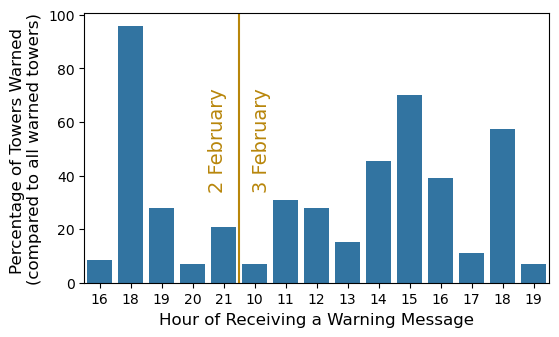

In [14]:
fig, axs = plt.subplots(1, 1, figsize=(6, 3.5))

sns.barplot(x='hour_day', y='perc_towers', data=warnings,
            ax=axs)

axs.set_ylabel('Percentage of Towers Warned \n(compared to all warned towers)', fontsize=12)
axs.set_xlabel('Hour of Receiving a Warning Message', fontsize=12)

axs.set_xticklabels(warnings['hour_day'].apply(lambda x: x[:2]))

axs.text(3.8, axs.get_ylim()[1] * 0.35, '2 February', ha='center',
         rotation=90, fontsize=14, color='darkgoldenrod')
axs.text(5.2, axs.get_ylim()[1] * 0.35, '3 February', ha='center', 
         rotation=90, fontsize=14, color='darkgoldenrod')

axs.axvline(4.5, color='darkgoldenrod')

fig.savefig('../visuals_created/notifications_towers_time.pdf',
            bbox_inches='tight',
            pad_inches=0)

plt.show();


## Describing Socioeconomic Indicators

In [15]:
geo_antennas_se, linear_range, quantile_range, quantile_pop_range = helper.create_se_bins(geo_antennas, 'percent_bachelor', 'total_people')

geo_antennas_se=geo_antennas_se.dropna().reset_index(drop=True)

In [16]:
# Original colors
orange = '#E69F00'
blue = '#56B4E9'
green = '#009E73'

darker_green = '#004C39'
lighter_green = '#66F2D4'

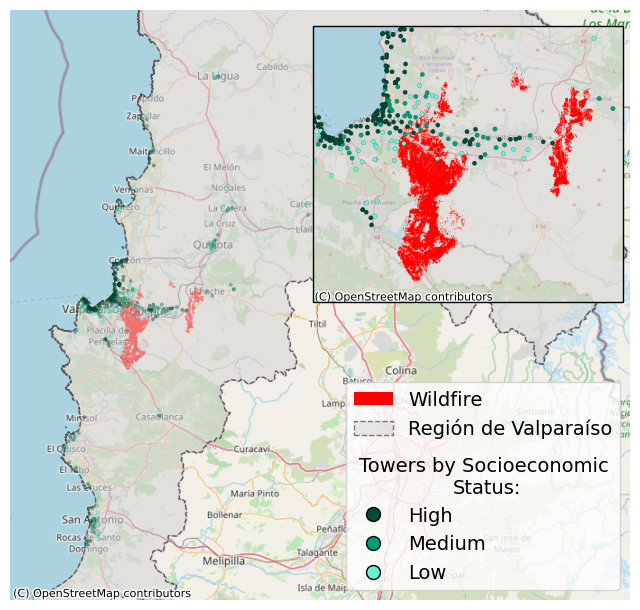

In [17]:
color_map = {'High': darker_green,
             'Medium': green,
             'Low': lighter_green}
geo_antennas_se['colors_ses'] = geo_antennas_se['quantile_pop_bins_percent_bachelor'].map(color_map)

# Main figure (gdf5, fires, towers)
fig, ax = plt.subplots(figsize=(8, 8))
chile_border_adm1[chile_border_adm1['ADM1_ES'] == 'Región de Valparaíso'].plot(color='lightgray', ax=ax, alpha=0.5,
                                                                               edgecolor='black', linestyle='--', linewidth=1)
incendio_gpd.plot(ax=ax, facecolor='red', alpha=0.5)
geo_antennas_se.plot(ax=ax, c=geo_antennas_se['colors_ses'], markersize=6, alpha=0.5, edgecolor='black', linewidth=0.1)
ax.set_xlim([-0.8*1e7, -0.779*1e7])
ax.set_ylim([-4*1e6, -3.8*1e6])
ax.set_axis_off()

# Add basemap to the main figure
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Create an inset figure (affected_towers)
ax_inset = inset_axes(ax, width="50%", height="50%",
                      loc='upper right')
chile_border_adm1[chile_border_adm1['ADM1_ES'] == 'Región de Valparaíso'].plot(color='lightgray', ax=ax_inset, alpha=0.5)
incendio_gpd.plot(ax=ax_inset, facecolor='red')
geo_antennas_se.plot(ax=ax_inset, c=geo_antennas_se['colors_ses'], markersize=10, edgecolor='black', linewidth=0.1)

# Set limits for the inset plot
ax_inset.set_xlim([-0.7975*1e7, -0.793*1e7])
ax_inset.set_ylim([-3.925*1e6, -3.885*1e6])

ax_inset.set_axis_off()

# Add basemap to the inset figure
ctx.add_basemap(ax_inset, source=ctx.providers.OpenStreetMap.Mapnik)
                # crs=geo_antennas.crs)

# Add a distinctive frame to the inset axis
rect = plt.Rectangle(
    (ax_inset.get_position().x0, ax_inset.get_position().y0),
    ax_inset.get_position().width,
    ax_inset.get_position().height,
    linewidth=1,  # Thickness of the border
    edgecolor='black',  # Color of the border
    facecolor='none',  # No fill inside the frame
    transform=fig.transFigure,  # Make sure the rectangle aligns with the figure coordinates
    linestyle='-',  # Solid line style, can be changed to '--', ':', etc.
    zorder=10       # Ensures the frame appears above other elements
)

fig.patches.append(rect)


rect1 = patches.Rectangle((0, 0), 1.3, 0.9, linewidth=0, color='red', alpha=1)
rect2 = patches.Rectangle((0, 0), 1.3, 0.9, linewidth=1, facecolor='lightgray', alpha=0.5,
                          edgecolor='black', linestyle='--')
subtitle_handle = plt.Line2D([0], [0], linestyle='None', marker='o', color='white', markersize=0)
rect3 = plt.Line2D([0], [0], marker='o', linewidth=0, markerfacecolor=darker_green, markersize=10, markeredgecolor='black')
rect4 = plt.Line2D([0], [0], marker='o', linewidth=0, markerfacecolor=green, markersize=10, markeredgecolor='black')
rect5 = plt.Line2D([0], [0], marker='o', linewidth=0, markerfacecolor=lighter_green, markersize=10, markeredgecolor='black')
handles_to_append = [rect1, rect2, subtitle_handle, subtitle_handle, rect3, rect4, rect5]

# Explicitly specify handles and labels for the legend
handles, labels = [], []
for line in ax.get_lines():
    handles.append(line)
    labels.append(line.get_label())
handles.extend(handles_to_append)

labels_to_append = ['Wildfire', 'Región de Valparaíso', '', '', 'High', 'Medium', 'Low']
labels.extend(labels_to_append)

ax.legend(handles, labels, fontsize=14, loc='lower right')

ax.text(0.77, 0.18, 'Towers by Socioeconomic \nStatus:', transform=ax.transAxes, fontsize=14, zorder=10,
           horizontalalignment='center')

fig.savefig('../visuals_created/map_warned_towers_ses.jpeg',
            dpi=300,
            bbox_inches='tight',
            pad_inches=0)

In [18]:
quantile_pop_range

array([ 9.6, 16.7, 26.2, 76.9])

In [19]:
def plot_coloured_bins(df_column, bin_ranges, ax, label):
    
    ax = sns.histplot(df_column, fill=True, bins=40, kde=True)
    
    colors = [lighter_green, green, darker_green]
    
    for bar in ax.containers[0]:
        # get x midpoint of bar
        x = bar.get_x() + 0.5 * bar.get_width()
    
        # set bar color based on x
        if x > bin_ranges[-2]:
            bar.set_color(colors[2])
            bar.set_edgecolor('black')
        elif x > bin_ranges[-3]:
            bar.set_color(colors[1])
            bar.set_edgecolor('black')
        # elif x > bin_ranges[-4]:
        #     bar.set_color(colors[2])
        #     bar.set_edgecolor('black')
        # elif x > bin_ranges[-5]:
        #     bar.set_color(colors[1])
        #     bar.set_edgecolor('black')
        else:
            bar.set_color(colors[0])
            bar.set_edgecolor('black')
    
    # Define legend labels
    legend_labels = ['Low', 'Medium', 'High']
    
    # Create proxy artists for the legend
    legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i], ec='black') for i in range(3)]
    
    
    ax.set_xlabel('Percentage of Residents with Higher Education', fontsize=12)
    ax.set_ylabel('Number of Towers', fontsize=12)

    ax.axvline(x=quantile_pop_range[1], color='darkgoldenrod', linestyle='--')
    ax.axvline(x=quantile_pop_range[2], color='darkgoldenrod', linestyle='--')

    ax.text(quantile_pop_range[1]*1.16, ax.get_ylim()[1] * 0.94, f'{quantile_pop_range[1]}', color='darkgoldenrod', 
            ha='center', fontsize=13)
    ax.text(quantile_pop_range[2]*1.11, ax.get_ylim()[1] * 0.94, f'{quantile_pop_range[2]}', color='darkgoldenrod', 
            ha='center', fontsize=13)

    # Extend legend labels
    legend_labels.extend(['Threshold Values'])
    
    # Extend handles legend
    line_handle = plt.Line2D([0], [0], color='darkgoldenrod', linestyle='--', linewidth=2)
    legend_handles.append(line_handle)

    # Add legend
    ax.legend(legend_handles, legend_labels, title=f'{label} Bins (SES)',
                 fontsize=12, title_fontsize=12)

    


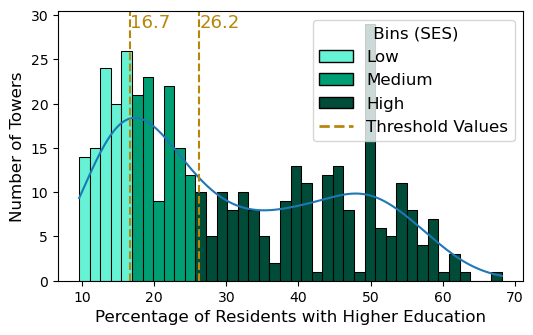

In [20]:
fig, axs = plt.subplots(1, 1, figsize=(6, 3.5))

plot_coloured_bins(df_column=geo_antennas_se['percent_bachelor'], 
                    bin_ranges=quantile_pop_range,
                    ax=axs,
                    label='')

fig.savefig('../visuals_created/distribution_towers_ses.pdf',
            bbox_inches='tight',
            pad_inches=0)

plt.show();

In [21]:
zonas_stats=geo_antennas_se[['ZONA', 'total_people', 'percent_bachelor', 'percent_female', 'percent_nonwhite',
       'percent_unemployed', 'percent_child', 'quantile_pop_bins_percent_bachelor']].drop_duplicates()

In [22]:
zonas_stats_agg= zonas_stats.groupby('quantile_pop_bins_percent_bachelor', observed=False).agg({'total_people':'sum',
                                                               'percent_female':'mean',
                                                               'percent_nonwhite':'mean',
                                                               'percent_unemployed':'mean',
                                                               'percent_child':'mean'}).reset_index()

In [23]:
zonas_stats_agg

,quantile_pop_bins_percent_bachelor,total_people,percent_female,percent_nonwhite,percent_unemployed,percent_child
0,Low,241170.0,51.320253,7.363291,60.202532,23.792405
1,Medium,237171.0,51.857471,6.710345,58.409195,20.201149
2,High,234222.0,52.038776,6.296939,57.712245,15.717347


In [24]:
ismt_gpd = gpd.read_file('../data/ismt_pais_todo.geojson', crs='EPSG:4326')

ismt_gpd=ismt_gpd[ismt_gpd['region'] == '05_VALPARAISO']

In [25]:
zonas_stats=zonas_stats.merge(ismt_gpd[['zona', 'ismtpn']], left_on='ZONA', right_on='zona', how='inner')

In [26]:
from scipy.stats import pearsonr, spearmanr

corr_p, _ = pearsonr(zonas_stats['percent_bachelor'], zonas_stats['ismtpn'])
corr_s, _ = spearmanr(zonas_stats['percent_bachelor'], zonas_stats['ismtpn'])

In [27]:
sns.reset_defaults() 

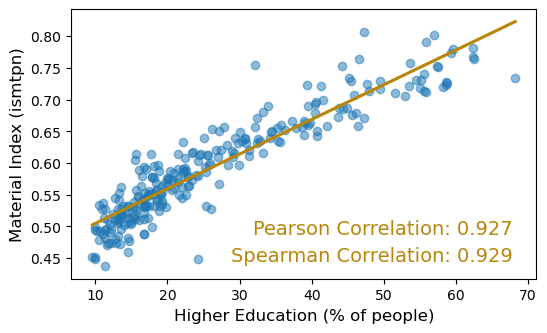

In [28]:
fig, axs = plt.subplots(1, 1, figsize=(6, 3.5))

# Plot with regplot
sns.regplot(x='percent_bachelor', y='ismtpn', data=zonas_stats[['percent_bachelor', 'ismtpn']], 
            ci=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'darkgoldenrod'},
            ax=axs)

# sns.scatterplot(x='percent_bachelor', y='ismtpn',  data=zonas_stats[['percent_bachelor', 'ismtpn']], ax=axs)

axs.set_xlabel('Higher Education (% of people)', fontsize=12)
axs.set_ylabel('Material Index (ismtpn)', fontsize=12)

# Annotate plot with correlation value
axs.text(0.95, 0.15, f'Pearson Correlation: {corr_p:.3f}', transform=plt.gca().transAxes, 
         horizontalalignment='right', verticalalignment='bottom', fontsize=14,
         color='darkgoldenrod')
axs.text(0.95, 0.05, f'Spearman Correlation: {corr_s:.3f}', transform=plt.gca().transAxes, 
         horizontalalignment='right', verticalalignment='bottom', fontsize=14,
         color='darkgoldenrod')

fig.savefig('../visuals_created/ses_comparison_educ_ismtpn.pdf',
            bbox_inches='tight',
            pad_inches=0)

# Show plot
plt.show();

## Describing Census Zones

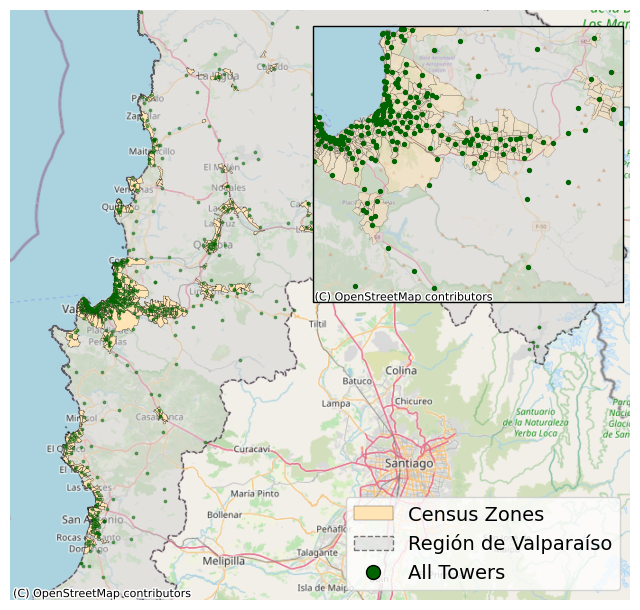

In [29]:
# Main figure (gdf5, fires, towers)
fig, ax = plt.subplots(figsize=(8, 8))
chile_border_adm1[chile_border_adm1['ADM1_ES'] == 'Región de Valparaíso'].plot(color='lightgray', ax=ax, alpha=0.5,
                                                                               edgecolor='black', linestyle='--', linewidth=1)
zonas_geo.plot(ax=ax, facecolor='moccasin', alpha=1, edgecolor='black', linewidth=0.2)
geo_antennas[geo_antennas['codregion']==5].plot(ax=ax, color='darkgreen', markersize=3, alpha=0.5)
ax.set_xlim([-0.8*1e7, -0.779*1e7])
ax.set_ylim([-4*1e6, -3.8*1e6])
ax.set_axis_off()

# Add basemap to the main figure
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Create an inset figure (affected_towers)
ax_inset = inset_axes(ax, width="50%", height="50%",
                      loc='upper right')
chile_border_adm1[chile_border_adm1['ADM1_ES'] == 'Región de Valparaíso'].plot(color='lightgray', ax=ax_inset, alpha=0.5)
zonas_geo.plot(ax=ax_inset, facecolor='moccasin', alpha=0.5, edgecolor='black', linewidth=0.2)
geo_antennas[geo_antennas['codregion']==5].plot(ax=ax_inset, color='darkgreen', markersize=8)

# Set limits for the inset plot
ax_inset.set_xlim([-0.7975*1e7, -0.793*1e7])
ax_inset.set_ylim([-3.925*1e6, -3.885*1e6])

ax_inset.set_axis_off()

# Add basemap to the inset figure
ctx.add_basemap(ax_inset, source=ctx.providers.OpenStreetMap.Mapnik)
                # crs=geo_antennas.crs)

# Add a distinctive frame to the inset axis
rect = plt.Rectangle(
    (ax_inset.get_position().x0, ax_inset.get_position().y0),
    ax_inset.get_position().width,
    ax_inset.get_position().height,
    linewidth=1,  # Thickness of the border
    edgecolor='black',  # Color of the border
    facecolor='none',  # No fill inside the frame
    transform=fig.transFigure,  # Make sure the rectangle aligns with the figure coordinates
    linestyle='-',  # Solid line style, can be changed to '--', ':', etc.
    zorder=10       # Ensures the frame appears above other elements
)

fig.patches.append(rect)


rect1 = patches.Rectangle((0, 0), 1.3, 0.9, facecolor='moccasin', alpha=1,
                          edgecolor='black', linewidth=0.2)
rect2 = patches.Rectangle((0, 0), 1.3, 0.9, linewidth=1, facecolor='lightgray', alpha=0.5,
                          edgecolor='black', linestyle='--')
rect3 = plt.Line2D([0], [0], marker='o', linewidth=0, markerfacecolor='darkgreen', markersize=10, markeredgecolor='black')
handles_to_append = [rect1, rect2, rect3]

# Explicitly specify handles and labels for the legend
handles, labels = [], []
for line in ax.get_lines():
    handles.append(line)
    labels.append(line.get_label())
handles.extend(handles_to_append)

labels_to_append = ['Census Zones', 'Región de Valparaíso', 'All Towers']
labels.extend(labels_to_append)

ax.legend(handles, labels, fontsize=14, loc='lower right')

fig.savefig('../visuals_created/map_towers_geozonas.jpeg',
            dpi=300,
            bbox_inches='tight',
            pad_inches=0)

plt.show();

In [30]:
geo_antennas_se.groupby('ZONA')['bts_id'].count().mean()

1.5265151515151516

In [31]:
len(zonas_geo['ZONA'].unique())

674

674 zonas

In [32]:
zonas_geo.total_people.mean()

2436.973293768546

In [33]:
zonas_geo.area.mean()/1e6

1.3557070776027744

In [34]:
zonas_geo_matched=zonas_geo.sjoin(geo_antennas[['bts_id','geometry']], how='inner').reset_index(drop=True)

In [35]:
len(zonas_geo_matched['bts_id'].unique()), len(zonas_geo_matched['GEOCODIGO'].unique())

(408, 265)

In [36]:
zonas_geo_matched=zonas_geo_matched.drop(columns=['index_right', 'bts_id']).drop_duplicates()

In [37]:
zonas_geo_warned=zonas_geo.sjoin(warned_towers_unique, how='inner').reset_index(drop=True)

In [38]:
len(zonas_geo_warned['bts_id'].unique()), len(zonas_geo_warned['GEOCODIGO'].unique())

(117, 94)

In [39]:
zonas_geo_warned=zonas_geo_warned.drop(columns=['index_right', 'bts_id']).drop_duplicates()

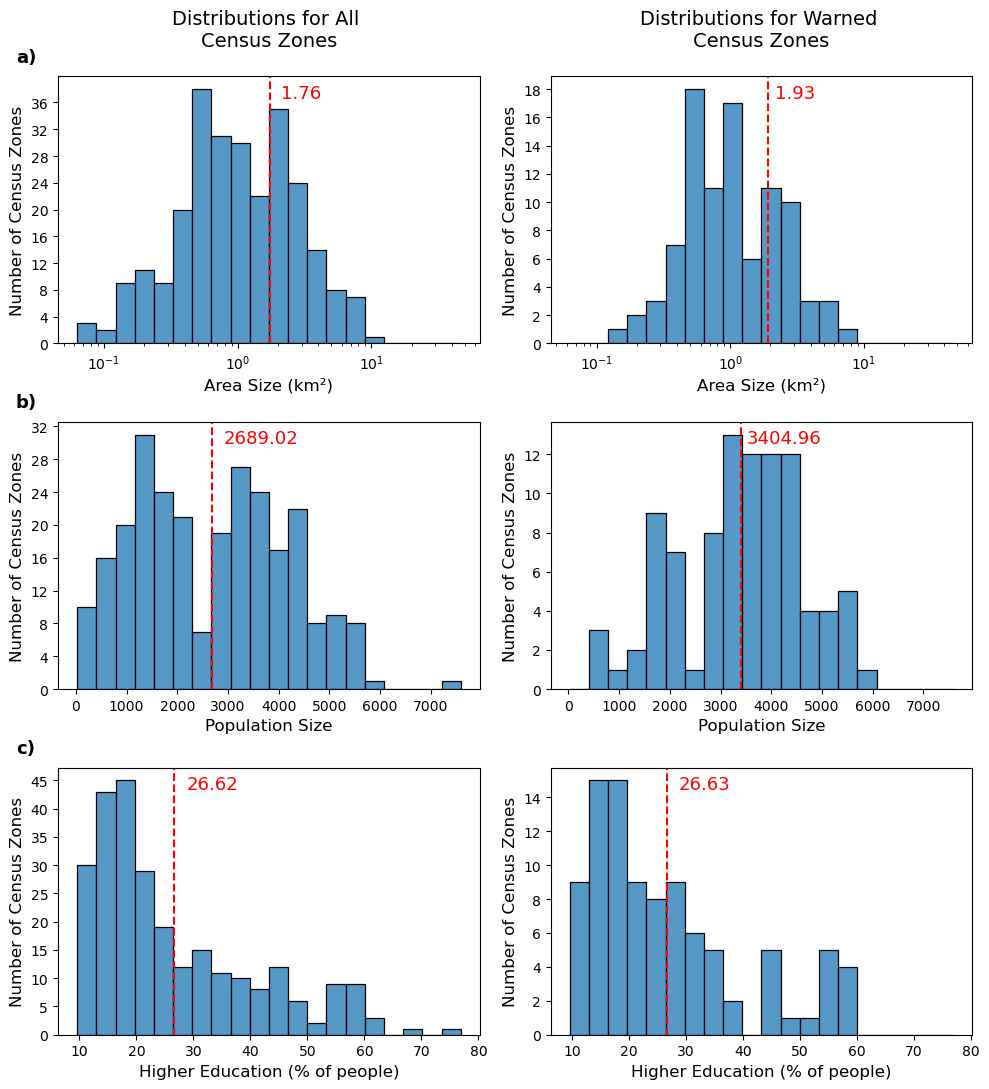

In [40]:
fig, axs=plt.subplots(3,2, figsize=(10,11))

## Total Area Size

bin_edges_area = np.logspace(np.log10(zonas_geo_matched.area.min() / 1e6), 
                             np.log10(zonas_geo_matched.area.max() / 1e6), 
                             21)
sns.histplot(zonas_geo_matched.area/1e6, bins=bin_edges_area, kde=False, 
                ax=axs[0,0], edgecolor='black', linewidth=0.9)
sns.histplot(zonas_geo_warned.area/1e6, bins=bin_edges_area, kde=False,
                ax=axs[0,1], edgecolor='black', linewidth=0.9)

axs[0,0].yaxis.set_major_locator(plt.MaxNLocator(integer=True))
axs[0,1].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

axs[0,0].set_ylabel('Number of Census Zones', fontsize=12)
axs[0,1].set_ylabel('Number of Census Zones', fontsize=12)

axs[0,0].set_xlabel('Area Size (km\u00B2)', fontsize=12)
axs[0,1].set_xlabel('Area Size (km\u00B2)', fontsize=12)

axs[0,0].set_title('Distributions for All \nCensus Zones\n', fontsize=14)
axs[0,1].set_title('Distributions for Warned \nCensus Zones\n', fontsize=14)

axs[0,0].set_xscale('log')
axs[0,1].set_xscale('log')


# Calculate the averages
average_all = zonas_geo_matched.area.mean()/1e6
average_warned = zonas_geo_warned.area.mean()/1e6

axs[0,0].axvline(average_all, color='red', linestyle='--', label=f'Avg: {average_all:.2f}')
axs[0,1].axvline(average_warned, color='red', linestyle='--', label=f'Avg: {average_warned:.2f}')

axs[0,0].text(average_all*1.7, axs[0,0].get_ylim()[1] * 0.92, f'{average_all:.2f}', color='red', 
            ha='center', fontsize=13)
axs[0,1].text(average_warned*1.6, axs[0,1].get_ylim()[1] * 0.92, f'{average_warned:.2f}', color='red', 
            ha='center', fontsize=13)


## Total Population

bin_edges_people = np.linspace(zonas_geo_matched.total_people.min(), zonas_geo_matched.total_people.max(), 21)

sns.histplot(zonas_geo_matched.total_people, bins=bin_edges_people, kde=False, 
                ax=axs[1, 0], edgecolor='black', linewidth=0.9)
sns.histplot(zonas_geo_warned.total_people, bins=bin_edges_people, kde=False,
                ax=axs[1, 1], edgecolor='black', linewidth=0.9)

axs[1,0].yaxis.set_major_locator(plt.MaxNLocator(integer=True))
axs[1,1].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

axs[1,0].set_ylabel('Number of Census Zones', fontsize=12)
axs[1,1].set_ylabel('Number of Census Zones', fontsize=12)

axs[1,0].set_xlabel('Population Size', fontsize=12)
axs[1,1].set_xlabel('Population Size', fontsize=12)

# axs[0].set_title('Distributions for All \nCensus Zones', fontsize=14)
# axs[1].set_title('Distributions for Warned \nCensus Zones', fontsize=14)


# Calculate the averages
average_all = zonas_geo_matched.total_people.mean()
average_warned = zonas_geo_warned.total_people.mean()

axs[1,0].axvline(average_all, color='red', linestyle='--', label=f'Avg: {average_all:.2f}')
axs[1,1].axvline(average_warned, color='red', linestyle='--', label=f'Avg: {average_warned:.2f}')

axs[1,0].text(average_all*1.36, axs[1,0].get_ylim()[1] * 0.92, f'{average_all:.2f}', color='red', 
            ha='center', fontsize=13)
axs[1,1].text(average_warned*1.25, axs[1,1].get_ylim()[1] * 0.92, f'{average_warned:.2f}', color='red', 
            ha='center', fontsize=13)

## Higher Educ

bin_edges_educ = np.linspace(zonas_geo_matched.percent_bachelor.min(), zonas_geo_matched.percent_bachelor.max(), 21)

sns.histplot(zonas_geo_matched.percent_bachelor, bins=bin_edges_educ, kde=False, 
                ax=axs[2, 0], edgecolor='black', linewidth=0.9)
sns.histplot(zonas_geo_warned.percent_bachelor, bins=bin_edges_educ, kde=False,
                ax=axs[2, 1], edgecolor='black', linewidth=0.9)

axs[2,0].yaxis.set_major_locator(plt.MaxNLocator(integer=True))
axs[2,1].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

axs[2,0].set_ylabel('Number of Census Zones', fontsize=12)
axs[2,1].set_ylabel('Number of Census Zones', fontsize=12)

axs[2,0].set_xlabel('Higher Education (% of people)', fontsize=12)
axs[2,1].set_xlabel('Higher Education (% of people)', fontsize=12)

# axs[0].set_title('Distributions for All \nCensus Zones', fontsize=14)
# axs[1].set_title('Distributions for Warned \nCensus Zones', fontsize=14)


# Calculate the averages
average_all = zonas_geo_matched.percent_bachelor.mean()
average_warned = zonas_geo_warned.percent_bachelor.mean()

axs[2,0].axvline(average_all, color='red', linestyle='--', label=f'Avg: {average_all:.2f}')
axs[2,1].axvline(average_warned, color='red', linestyle='--', label=f'Avg: {average_warned:.2f}')

axs[2,0].text(average_all*1.25, axs[2,0].get_ylim()[1] * 0.92, f'{average_all:.2f}', color='red', 
            ha='center', fontsize=13)
axs[2,1].text(average_warned*1.25, axs[2,1].get_ylim()[1] * 0.92, f'{average_warned:.2f}', color='red', 
            ha='center', fontsize=13)

plt.tight_layout(h_pad=2)

plots_l = ['a)', '', 'b)', '', 'c)', '']
for ia, ax in enumerate(fig.axes): 
    x,y = -0.1,1.04
    ax.text(x,y,  plots_l[ia],
        color = 'k',#'lightgreen',
        horizontalalignment='left',
        verticalalignment='bottom',
        weight = 'bold',
        transform=ax.transAxes,fontsize = 13)

fig.savefig('../visuals_created/distributions_geozonas.pdf',
            bbox_inches='tight',
            pad_inches=0)

plt.show();

In [41]:
# Shut down the kernel to release memory
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(restart=False)

{'status': 'ok', 'restart': False}